# Assigment 2 BS19
Kirill Glinskiy
Robotics
k.glinsky@innopolis.university
@amrtized

#### Importing phase

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from random import randint
import copy
import warnings
import glob
from PIL import Image

#### Parsing the dataset

In [2]:
warnings.filterwarnings('ignore')

# First, let's read the file and sort it by population size
df_cities = pd.read_csv('city.csv').sort_values(by=['population'],ascending=False)

In [3]:
# Now, let's leave only needed columns and 30 cities
df_cities = df_cities[:30][['address','geo_lat','geo_lon','population']].reset_index()

In [4]:
df_cities

index                                       address    geo_lat  \
0     509                                      г Москва  55.754047   
1     786                             г Санкт-Петербург  59.939131   
2     647                                 г Новосибирск  55.028191   
3     832                                г Екатеринбург  56.838522   
4     619                             г Нижний Новгород  56.324063   
5     927                                      г Казань  55.794358   
6     782                                      г Самара  53.195031   
7     656                                        г Омск  54.984857   
8    1064                                   г Челябинск  55.160262   
9     757                              г Ростов-на-Дону  47.222457   
10     62                                         г Уфа  54.734944   
11    121                                   г Волгоград  48.707004   
12    706                                       г Пермь  58.010258   
13    411                                  г Красноярск  56.009388   
14    159                                     г Воронеж  51.659333   
15    801                                     г Саратов  51.533557   
16    381                                   г Краснодар  45.040160   
17    784                     Самарская обл, г Тольятти  53.520535   
18      4                                     г Барнаул  53.347997   
19    999                                      г Ижевск  56.852738   
20   1008                                   г Ульяновск  54.307941   
21    717                                 г Владивосток  43.116490   
22   1116                                   г Ярославль  57.621548   
23    223                                     г Иркутск  52.286404   
24    995                                      г Тюмень  57.152974   
25    177                                   г Махачкала  42.984916   
26   1015                                   г Хабаровск  48.464726   
27    666                                    г Оренбург  51.787509   
28    322  Кемеровская область - Кузбасс, г Новокузнецк  53.794315   
29    316                                    г Кемерово  55.391065   

       geo_lon  population  
0    37.620405    11514330  
1    30.315900     4848742  
2    82.921149     1498921  
3    60.605491     1377738  
4    44.005391     1250615  
5    49.111497     1216965  
6    50.106952     1164900  
7    73.367452     1154000  
8    61.400808     1130273  
9    39.718803     1091544  
10   55.957847     1062300  
11   44.517034     1021244  
12   56.234203     1000679  
13   92.852481      973826  
14   39.196923      889680  
15   46.034257      836900  
16   38.975965      744933  
17   49.389403      719484  
18   83.779806      635585  
19   53.211490      628117  
20   48.374849      613793  
21  131.882394      592069  
22   39.897741      591486  
23  104.280747      587225  
24   65.534410      581758  
25   47.504718      577990  
26  135.059894      577668  
27   55.101883      570329  
28   87.214275      547885  
29   86.046778      532884

In [5]:
# Function to generate initial connection between 30 cities

def generate_init_path():
    arr = list(range(0,30))
    # Fisher–Yates shuffle algorithm (taken from https://www.geeksforgeeks.org/shuffle-a-given-array-using-fisher-yates-shuffle-algorithm/)
    for i in range(len(arr)-1,0,-1):
        # Pick a random index from 0 to i
        j = randint(0,i+1)
        # Swap arr[i] with the element at random index
        arr[i],arr[j] = arr[j],arr[i]
    for i in range(0,len(arr)):
        if i != len(arr) - 1:
            arr[i] = [arr[i],arr[i+1]]
        else:
            arr[i] = [arr[i],arr[0][0]]
    return arr

In [6]:
# Function to draw the paths between cities on the plot
def draw_paths(path):
    global m
    for source, dest in path:
        if float(df_cities.iloc[[source]]['geo_lon']) != float(df_cities.iloc[[dest]]['geo_lon']) and float(df_cities.iloc[[source]]['geo_lat']) != float(df_cities.iloc[[dest]]['geo_lat']):
            m.drawgreatcircle(df_cities.iloc[[source]]['geo_lon'], df_cities.iloc[[source]]['geo_lat'], df_cities.iloc[[dest]]['geo_lon'], df_cities.iloc[[dest]]['geo_lat'], linewidth=1)

In [9]:
def plot_map_from_path(path):
    global m
    # Plotting initial figure
    fig = plt.figure(figsize=(25, 15))

    # Plotting map projection
    m = Basemap(projection='lcc', resolution=None,
                width=10E6, height=5E6, 
                lat_0=66.4167, lon_0=94.2500,)
    m.bluemarble()

    # Function to plot cities names and their respective position on map
    def plot_cities(cities):
        for index, row in cities.iterrows():
            x,y = m(row['geo_lon'],row['geo_lat'])
            plt.plot(x,y, 'ok', markersize=5,c='w')
            plt.text(x,y, row['address'], fontsize=8,c='w')

    # Plotting initial path
    draw_paths(path)
    plot_cities(df_cities)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


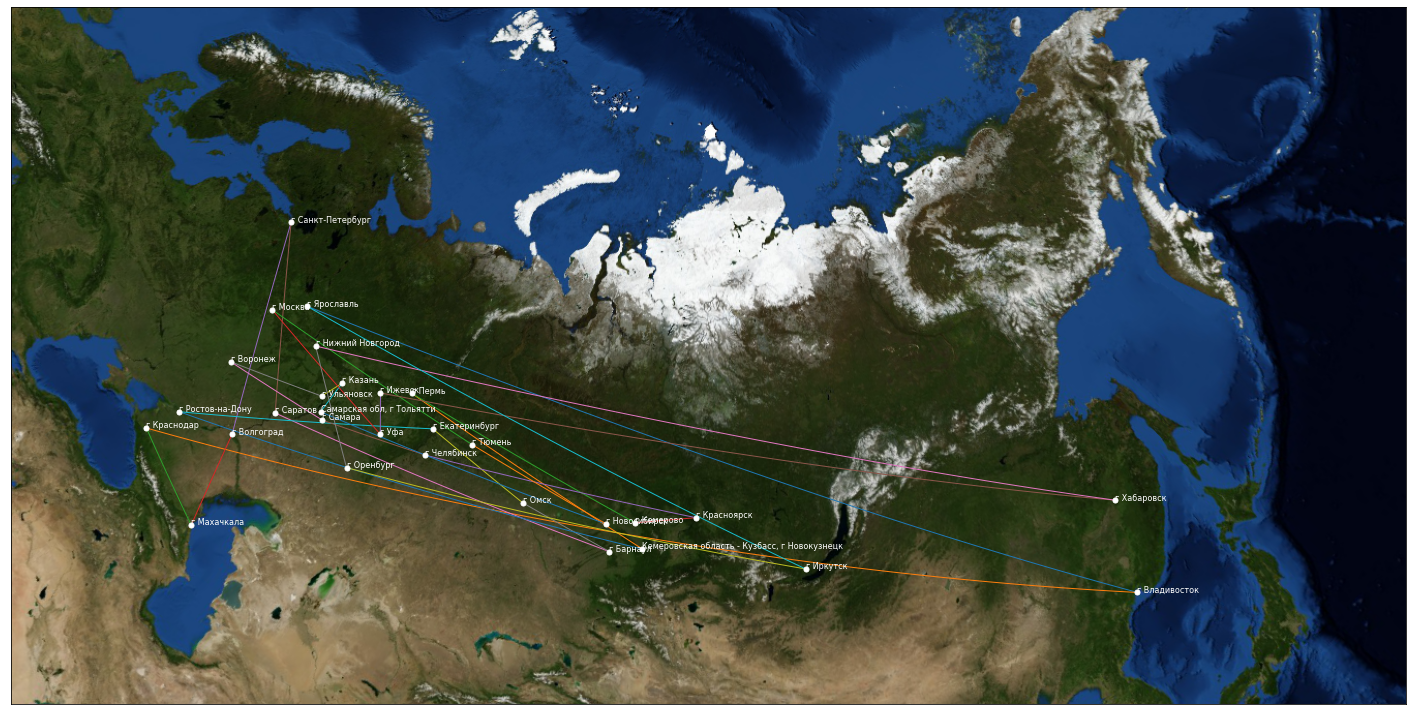

In [10]:
plot_map_from_path(generate_init_path())

In [11]:
# Function for generating a new path. Here I simply swap two random cities between each other.
def generate_new_path(x):
    x1 = copy.deepcopy(x)
    swap_city_1, swap_city_2 = randint(0,29),randint(0,29)
    index_swap = -1
    for i in range(len(x1)):
        if x1[i][0] == swap_city_1:
            x1[i][0] = swap_city_2
            index_swap = i
        if x1[i][1] == swap_city_1:
            x1[i][1] = swap_city_2
    for i in range(len(x1)):
        if x1[i][0] == swap_city_2 and (index_swap != i):
            x1[i][0] = swap_city_1
        if x1[i][1] == swap_city_2 and (index_swap != i + 1):
            x1[i][1] = swap_city_1
    return x1

In [12]:
# Function to calculate sum of distances between each existing path between cities
def calculate_dist(path):
    sum_dist = 0
    for pair in path:
        source,dest = pair
        source_x, source_y = m(df_cities.iloc[[source]]['geo_lon'], df_cities.iloc[[source]]['geo_lat'])
        dest_x, dest_y = m(df_cities.iloc[[dest]]['geo_lon'], df_cities.iloc[[dest]]['geo_lat'])
        sum_dist += np.sqrt((source_x - dest_x)**2 + (source_y - dest_y)**2)
    return sum_dist

In [13]:
x_final = []

## Simulated Annealing Design
Below I present my core function for algorithm. Transformation of lattitude and longitude to matplotlib 2D coorinates is done directly with Basemap Python Package (with Basemap() function).  All calculation of distancies between cities are done in 2D axes space of matplotlib figure. That's why we are dealing this pseudo-real distance units (nor meters, neither kilometers). I took an advantage of recursive functions approach, assuming that program terminates it's work while $T <= 0$, as the system cools down.

Acceptance ratio formula:
$$\Large a = e^{\frac{dist(x_{new}) - dist(x)}{T}}$$ where dist is sum of all existing paths between cities, T is current T value, x_new is new configuration of paths between cities, x is current configuration of paths between cities.

In [25]:
def simmulated_annealing(T,x,time_step,T_step):
    global x_final
    if T <= 0 :
        print("Finished Algorithm on ", time_step, " iteration")
    else:
        x_new = generate_new_path(x)
        
        if time_step % T_step == 0:
            print("Current distance between all cities: ", calculate_dist(x), "Timestep: ", time_step)
            x_final.append(x)
            
        acceptance_ratio = np.exp((-calculate_dist(x_new)/T) + (calculate_dist(x)/T))
        
        u = np.random.uniform(0, 1)
        if u <= acceptance_ratio:
            time_step += 1
            T -= T_step
            simmulated_annealing(T,x_new,time_step,T_step)
        else:
            time_step += 1
            T -= T_step
            simmulated_annealing(T,x, time_step,T_step)


## Launching the algorithm

Below we launch Simmulated Annealing algorithm with $T_{init} = 250000$ and convergence rate of $T = 100$ .

In [26]:
simmulated_annealing(100000, generate_init_path(),0, 100)

Current distance between all cities:  [58689379.56033133] Timestep:  0
Current distance between all cities:  [33750526.2384977] Timestep:  100
Current distance between all cities:  [29043305.01389258] Timestep:  200
Current distance between all cities:  [27144851.44828601] Timestep:  300
Current distance between all cities:  [26742114.83202772] Timestep:  400
Current distance between all cities:  [26403594.88329594] Timestep:  500
Current distance between all cities:  [25768618.23703408] Timestep:  600
Current distance between all cities:  [25070338.05283626] Timestep:  700
Current distance between all cities:  [25014298.30683615] Timestep:  800
Current distance between all cities:  [24901784.08799676] Timestep:  900
Finished Algorithm on  1000  iteration


In [ ]:
## Function to save each image frame between 15 iterations
ims = []
for i in range(len(x_final)):
    if i % 15 == 0:
        fig = plt.figure(figsize=(25, 15))

        m = Basemap(projection='lcc', resolution=None,
                width=10E6, height=5E6, 
                lat_0=66.4167, lon_0=94.2500)

        plot_cities(df_cities)
        m.bluemarble()
        draw_paths(x_final[i])

        ims.append([fig.savefig("images\image" + str(i))])

### Making the Gif Animation

In [79]:
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save("map.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

make_gif("images")

## Plotting the last iteration of algorithm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


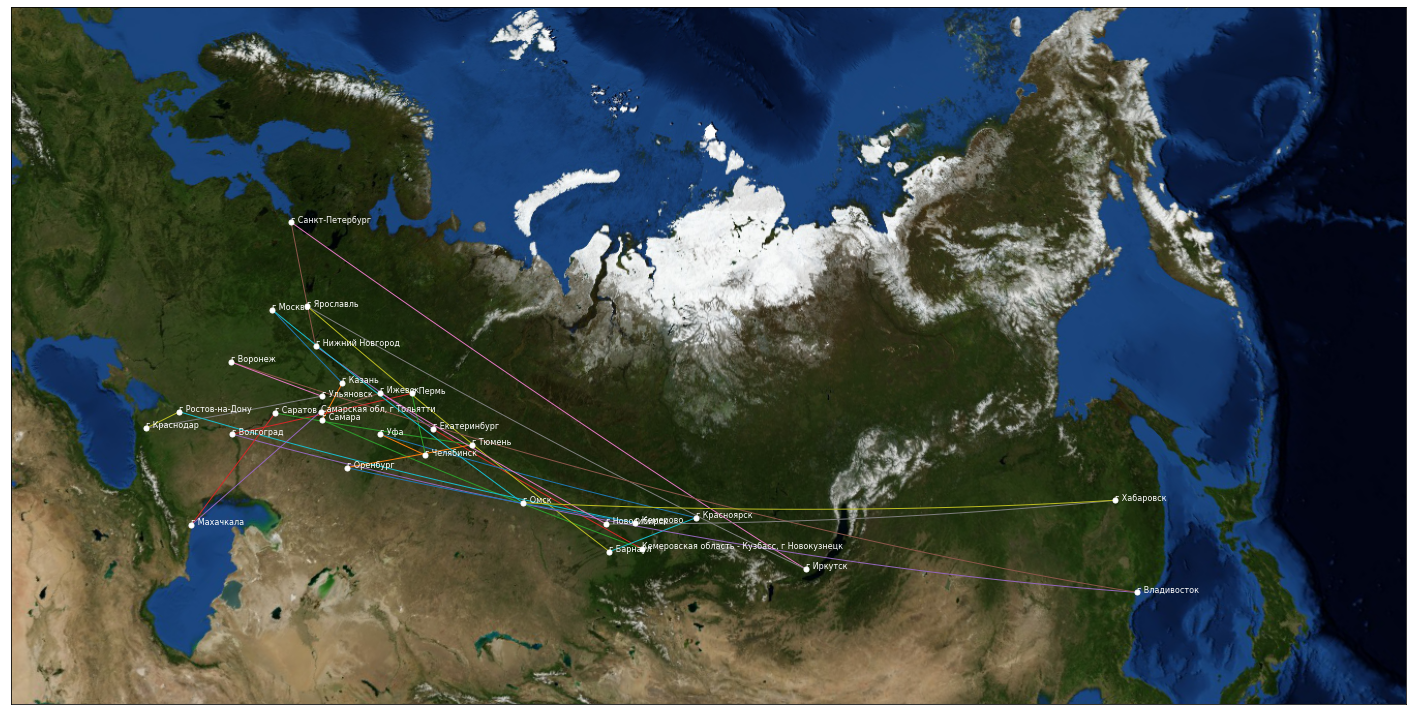

In [83]:
plot_map_from_path(x_final[-1])

## Comparison between different convergence rates

In [31]:
# Function for storing distances
def simmulated_annealing_comparison(T,x,time_step,T_step):
    global sum_distances
    global timesteps
    if T <= 0 :
        print("Finished Algorithm on ", time_step, " iteration")
    else:
        x_new = generate_new_path(x)
        
        sum_distances.append(calculate_dist(x))
        timesteps.append(time_step)
            
        acceptance_ratio = np.exp((-calculate_dist(x_new)/T) + (calculate_dist(x)/T))
        
        u = np.random.uniform(0, 1)
        if u <= acceptance_ratio:
            time_step += 1
            T -= T_step
            simmulated_annealing_comparison(T,x_new,time_step,T_step)
        else:
            time_step += 1
            T -= T_step
            simmulated_annealing_comparison(T,x, time_step,T_step)

Finished Algorithm on  1000  iteration
Finished Algorithm on  167  iteration
Finished Algorithm on  100  iteration


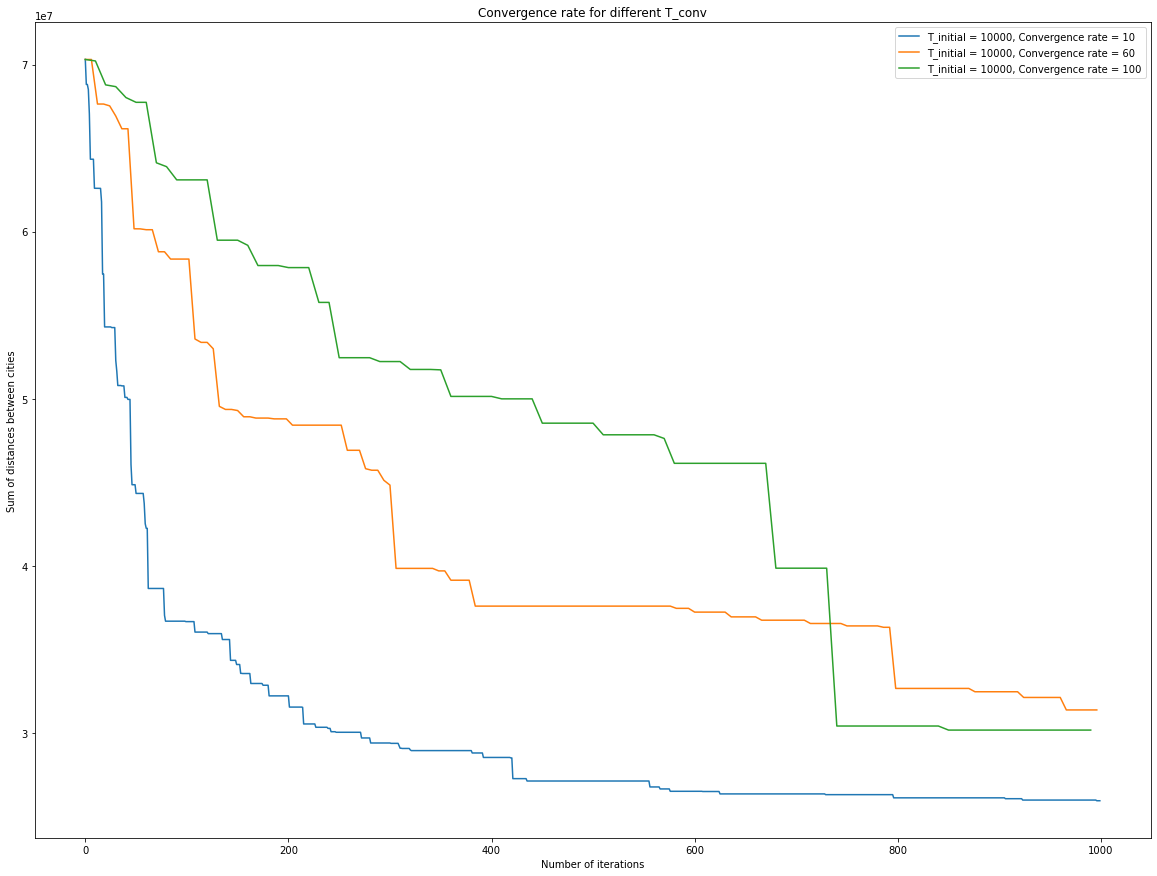

In [43]:
fig = plt.figure(figsize=(20, 15))

sum_distances = []
timesteps = []

iniitial_path = generate_init_path()
simmulated_annealing_comparison(10000, iniitial_path,0, 10)

plt.plot(list(range(0, 1000, 1)), sum_distances, label='T_initial = 10000, Convergence rate = 10')

sum_distances = []
timesteps = []

simmulated_annealing_comparison(10000, iniitial_path,0, 60)

plt.plot(list(range(0, 1000, 6)), sum_distances, label='T_initial = 10000, Convergence rate = 60')

sum_distances = []
timesteps = []

simmulated_annealing_comparison(10000, iniitial_path,0, 100)

plt.plot(list(range(0, 1000, 10)), sum_distances, label='T_initial = 10000, Convergence rate = 100')

plt.xlabel('Number of iterations')
plt.ylabel('Sum of distances between cities')

plt.title("Convergence rate for different T_conv")

plt.legend()

plt.show()